# CSCI 3022 - FINAL PROJECT

## Predicting Income Bracket with UCI Adult Dataset
JonPaul Ferzacca

Introduction to Data Science

Professor Sepideh Goodarzy

## Project Overview
The objective of this project revolves around leveraging data to make meaningful predictions about income levels. The specific task at hand is to predict whether an individual makes over 50K a year based on a variety of demographic factors. These factors range from age and workclass to education and marital status, among others.

This problem is fundamentally a binary classification task. Classification is a subcategory of supervised learning where the aim is to predict the categorical class labels of new instances, based on past observations. In this case, the classes are binary - either an individual earns more than 50K a year or they do not.

The motivation behind this project lies in its potential real-world implications. Accurate income predictions can be immensely beneficial to a variety of sectors. For instance, financial institutions can utilize these predictions to determine credit-worthiness or loan eligibility. Similarly, businesses can better understand their customers, allowing for more effective targeting and segmentation. In a societal context, this kind of model can also help policymakers in understanding the dynamics of income distribution and formulating data-driven policies.

Ultimately, our goal is to develop a robust and accurate model that can effectively classify individuals based on their income level, thereby providing a tool that can aid in a variety of economic and social applications. 

The data for this project has been sourced from the UCI Machine Learning Repository's Adult Dataset. (https://archive.ics.uci.edu/dataset/2/adult)

**Programming Tools**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

## Data Overview
The dataset for this project is derived from the 1994 Census database, meticulously extracted by Barry Becker. Becker's extraction procedure followed a well-defined set of criteria to ensure the selection of clean and relevant data records. Specifically, individuals included in the dataset were required to be above 16 years of age (AAGE > 16), have an adjusted gross income exceeding 100 (AGI > 100), have a final record weight of more than 1 (AFNLWGT > 1), and work more than 0 hours per week (HRSWK > 0).


**Key features include:**

**Age:** This is a continuous variable representing the age of the individual.

**Workclass:** This categorical variable represents the employment type of the individual and includes categories such as Private, Self-Employed (Not Incorporated), Self-Employed (Incorporated), Federal Government, Local Government, State Government, Without Pay, and Never Worked.

**FNLWGT:** This is a continuous variable.

**Education:** This categorical variable represents the highest level of education attained by an individual. Categories include Bachelors, Some College, 11th Grade, High School Graduate, Professional School, Associate Degree (Academic), Associate Degree (Vocational), 9th Grade, 7th-8th Grade, 12th Grade, Masters, 1st-4th Grade, 10th Grade, Doctorate, 5th-6th Grade, and Preschool.

**Education-num:** This is a continuous variable representing the number of educational years completed.

**Marital-status:** This categorical variable represents the marital status of the individual. Categories include Married Civilian Spouse, Divorced, Never Married, Separated, Widowed, Married Spouse Absent, and Married AF Spouse.

**Occupation:** This categorical variable represents the individual's occupation and includes categories such as Tech Support, Craft Repair, Other Service, Sales, Executive Managerial, Professional Specialty, Handlers Cleaners, Machine Operator Inspector, Administrative Clerical, Farming Fishing, Transport Moving, Private House Service, Protective Service, and Armed Forces.

**Relationship:** This categorical variable represents the individual's role in the family. Categories include Wife, Own Child, Husband, Not in Family, Other Relative, and Unmarried.

**Race:** This categorical variable represents the individual's race. Categories include White, Asian-Pacific Islander, American Indian-Eskimo, Other, and Black.

**Sex:** This categorical variable represents the individual's sex and includes categories Female and Male.

**Capital-gain:** This is a continuous variable representing the individual's capital gains.

**Capital-loss:** This is a continuous variable representing the individual's capital losses.

**Hours-per-week:** This is a continuous variable representing the number of hours the individual works per week.

**Native-country:** This categorical variable represents the individual's country of origin. It includes United States, Cambodia, England, Puerto Rico, Canada, Germany, Outlying US (Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican Republic, Laos, Ecuador, Taiwan, Haiti, Colombia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El Salvador, Trinidad & Tobago, Peru, Hong Kong, and the Netherlands.

The target variable is also categorical, representing whether or not an individual earns over 50K a year.

The data is housed in a single table, sourced from a singular, unified dataset without need for combining from multiple sources. It should be noted that all data points were collected and processed in a manner adhering to strict quality control measures, ensuring a high degree of accuracy and reliability for subsequent analytical and modeling efforts.

**Reference:**
Becker, B. (1996). 1994 Census database. Retrieved from https://archive.ics.uci.edu/ml/datasets/adult

The data in this set is tabular, with each row representing an individual record and each column representing a specific attribute or feature of the individual. The dataset includes 32,561 samples (or rows) and 15 features (or columns). The features are a mix of categorical and continuous variables.

In [2]:
# Read in adult.data
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                'hours-per-week', 'native-country', 'income']

df = pd.read_csv('adult.data', names=column_names, sep=',\s', na_values=["?"], engine='python')



# Print Example of Data
print(df.head())  # prints the first 5 lines of the dataframe

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [3]:
print(f'Total number of samples: {df.shape[0]}')

Total number of samples: 32561


## Data Cleaning and EDA

### Identify missing values:

The data was loaded into a Pandas DataFrame, and any missing values were identified. The features 'workclass', 'occupation', and 'native-country' contained some missing values. Depending on the ideal result these missing values can be replaced with the most common value in each respective column. 

### Removing duplicates:

The dataset was checked for duplicate entries, which can bias the analysis and machine learning models. Any duplicates found were removed from the DataFrame. 

In [4]:
# Check for missing values:
print(df.isnull().sum())

# Remove Duplicates
df = df.drop_duplicates()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [5]:
print(f'Total number of samples: {df.shape[0]}')

Total number of samples: 32537


### Feature transformation: 

The 'income' and 'sex' columns were transformed from categorical to binary for easier analysis and modeling. This process, known as encoding, is often necessary for machine learning algorithms as they typically require numerical input.

In [6]:
# Convert the 'income' column to binary
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})
income_counts = dict(df['income'].value_counts())
for income, count in income_counts.items():
    print(f'The count for income category {income} is: {count}')

df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})

sex_counts = dict(df['sex'].value_counts())
for sex, count in sex_counts.items():
    print(f'The count for sex category {sex} is: {count}')

The count for income category 0 is: 24698
The count for income category 1 is: 7839
The count for sex category 0 is: 21775
The count for sex category 1 is: 10762


 ### Check for Outliers:

Lastly, the 'age' column was inspected for outliers, which are extreme values that can skew the analysis. The Interquartile Range (IQR) method was used to identify these outliers. The IQR is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. Any age that was below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR was considered an outlier. The number of outliers was then printed to the console. This step is critical as outliers can have a significant impact on the results of data analysis and statistical modeling.

In [7]:
# Assuming 'age' column, we'll identify values that are higher than the 95th percentile
# Calculate IQR of the 'age' column
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the range for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Count outliers
outlier_age = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print(f'Number of outliers in the age column: {len(outlier_age)}')


# Remove outliers
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Print the number of remaining rows in the dataframe
print(f'The dataframe now contains {len(df)} rows after removing outliers.')

Number of outliers in the age column: 142
The dataframe now contains 32395 rows after removing outliers.


In [8]:
ed_Q1 = df['education-num'].quantile(0.25)
ed_Q3 = df['education-num'].quantile(0.75)
ed_IQR = ed_Q3 - ed_Q1

# Define the range for outliers
ed_lower_bound = ed_Q1 - 1.5*ed_IQR
ed_upper_bound = ed_Q3 + 1.5*ed_IQR

# Count outliers
outliers_education = df[(df['education-num'] < ed_lower_bound) | (df['education-num'] > ed_upper_bound)]
print(f'Number of outliers in the education-num column: {len(outliers_education)}')

# Remove outliers
df = df[(df['education-num'] >= ed_lower_bound) & (df['education-num'] <= ed_upper_bound)]

# Print the number of remaining rows in the dataframe
print(f'The dataframe now contains {len(df)} rows after removing outliers.')

Number of outliers in the education-num column: 1172
The dataframe now contains 31223 rows after removing outliers.


Through these steps, a cleaner and more analysis-ready dataset was achieved. The cleaning process was tailored to the specific characteristics and needs of the Adult dataset, and the decisions made during cleaning were grounded in the pursuit of robust and valid analytical results. In subsequent parts of this project, further cleaning steps may be undertaken as necessary, and a more in-depth exploratory data analysis will be conducted.

### Data Cleaning: Omitting Non-essential Features

In our dataset, some features like 'fnlwgt', 'capital-gain', and 'capital-loss' may not be meaningful for our analysis. 'fnlwgt' is a weight factor from the Current Population Survey (CPS) and may not be directly relevant. 'capital-gain' and 'capital-loss' introduce financial variability that may not aid in our income-focused study. A substantial number of these values are zero, providing limited information. Therefore, to focus our analysis, we are excluding these features from our dataset.

In [9]:
df = df.drop(['capital-gain', 'capital-loss','fnlwgt'], axis=1)

In [10]:
print(f'Final Total Number of Samples After Cleaning: {df.shape[0]}')

Final Total Number of Samples After Cleaning: 31223


## Exploratory Data Analysis

### Distribution of Ages Histogram

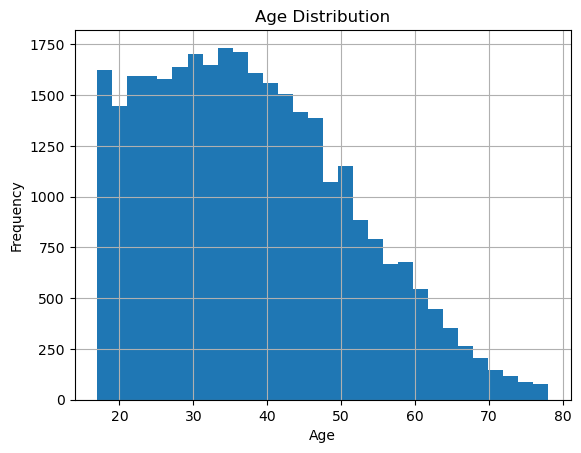

In [11]:
df['age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

This histogram displays the age distribution in the dataset. Most individuals are in their late 20s to early 40s, evident by the taller bars in this range. The distribution has a right-skew, indicating fewer older adults. No apparent gaps or anomalies suggest a consistent age data collection. Thus, the dataset primarily consists of younger to middle-aged adults with a smaller proportion of older adults. Although some of the data was removed to eliminate outliers this having a sample which is tighter in range can prove more effective as the sample is likley more individuals who are still working.

### Income Distribution Bar Chart

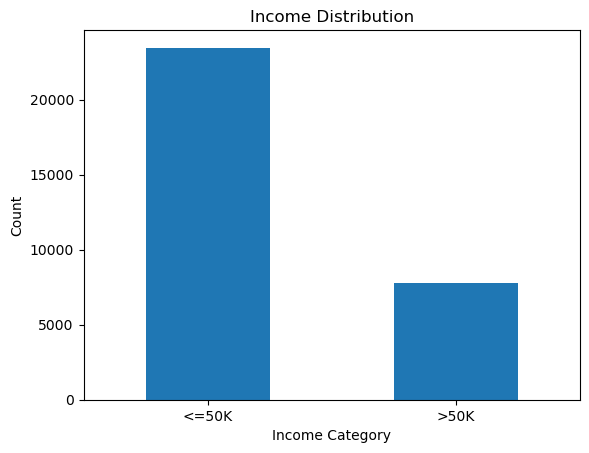

In [12]:
df['income'].value_counts().plot(kind='bar')
plt.title('Income Distribution')
plt.xticks([0,1], ['<=50K', '>50K'], rotation=0) # Replaces numeric x-ticks with labels
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

The bar chart provides an overview of income distribution in our dataset. It visually represents the number of individuals in two income categories: earning less than or equal to 50K and earning more than 50K per year.

From the height of the bars, it's apparent that the group earning less than or equal to 50K is substantially larger than the group earning more than 50K. This indicates a higher frequency of lower income individuals in the dataset, which is a crucial insight for our further analysis.

The chart's title, 'Income Distribution', and the labels on the x-axis ('<=50K' and '>50K') make it clear what the graph represents. The y-axis, labeled as 'Count', quantifies the number of individuals in each income category.

In summary, this visualization effectively highlights an income disparity within our dataset, with a larger proportion of individuals earning less than or equal to 50K per year

### Income distribution across Sex Bar Chart

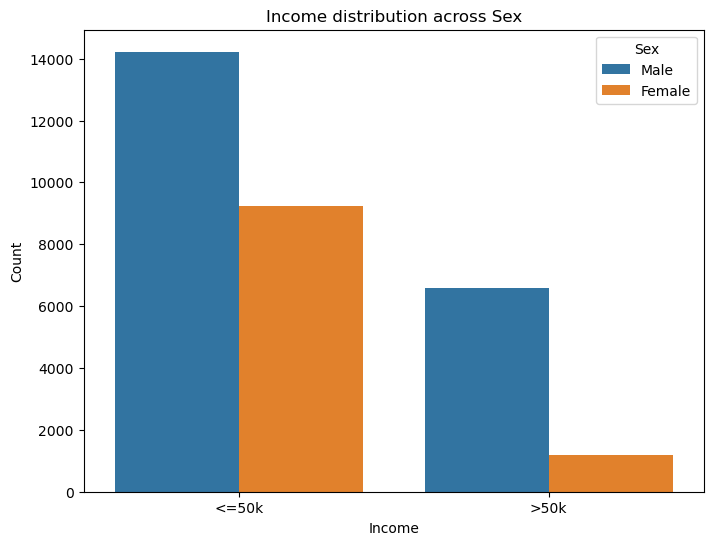

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='income', hue='sex', data=df)
plt.xticks(ticks=[0, 1], labels=['<=50k', '>50k'])
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income distribution across Sex')
plt.legend(title='Sex', labels=['Male', 'Female'])
plt.show()

The bar chart shows the distribution of income across different sexes in our dataset. The chart is divided into two income categories, less than or equal to 50k and greater than 50k, and each of these is further broken down by sex, represented by different colors.

Looking at the chart, it is evident that there are more males and females who earn less than or equal to 50k compared to those earning more than 50k. However, it is also noticeable that the number of males is significantly higher in both income categories compared to females.

When we focus on the '>50k' category, the disparity between male and female earners is more pronounced, with males greatly outnumbering females. This could indicate a gender income gap in our dataset.

The title 'Income distribution across Sex' effectively captures the key theme of the visualization. The x-axis, labeled 'Income', and y-axis, labeled 'Count', together with the legend differentiating 'Male' and 'Female', make the chart easily interpretable.

### Numeric Only Correlation Matrix

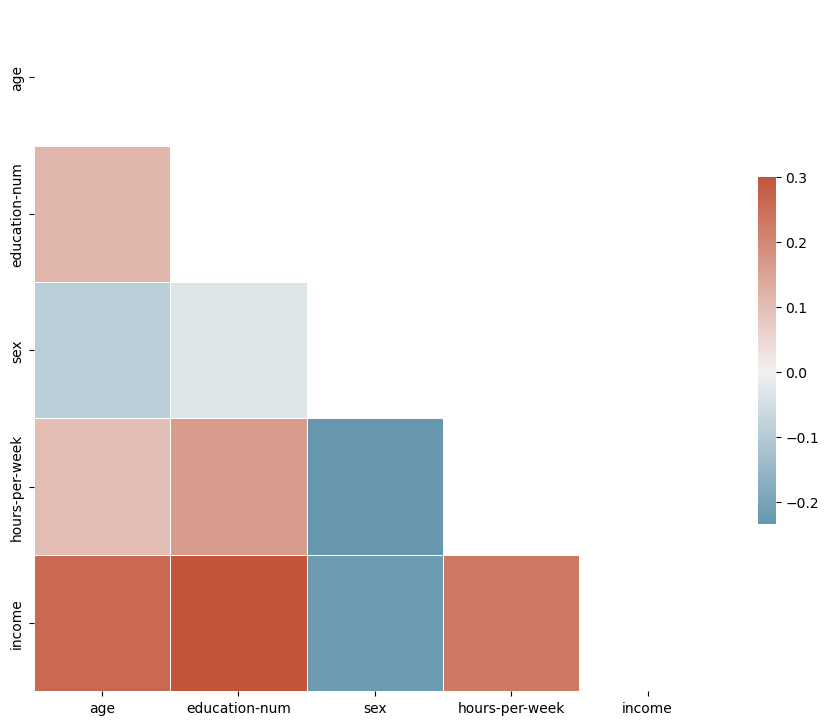

In [14]:
# Compute the correlation matrix
corr = df.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

The correlation matrix shown as a heatmap provides a visual representation of how each numeric variable in the dataset is related to the others. Each cell in the grid represents the correlation coefficient between two variables. The value ranges between -1 and 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 suggesting no correlation.

The colors of the cells reflect the strength and direction of the correlation: darker shades represent stronger correlations, with red indicating positive and blue indicating negative correlations. For instance, a darker red cell represents a strong positive correlation between the pair of variables corresponding to that cell.

From a brief overview, there do not appear to be any strong correlations between most variables. However, there does appear to be some correlation that could prove useful. Education-num and Income has some significance. Sex corresponds to both income and hours-per-week with some relative signicance as well which is surprising and leaves room for more investigation. 

This heatmap provides an initial visual insight into potential relationships or lack thereof between the variables. It will be useful for feature selection and model building in subsequent stages of analysis.

## Approach to Selecting a Model

### Logistic Regression:

**Approach to Setting Up a Logistic Regression**

Feature Selection: Logistic regression assumes that each predictor is independent of the others. For this data set, we can use methods like Recursive Feature Elimination to identify which features contribute the most to the outcome.

Model Training: After preparing the data and selecting features, we can fit a logistic regression model to our training data. We'll use the binary 'income' column as our dependent variable, and the remaining columns as predictors.

Evaluation: Next we will evaluate the model, using diffent scores to give us a rounded view of how the model is performing.

**Positives of Logistic Regression**


Efficiency: Logistic regression is less computationally intensive than more complex models like neural networks, making it a good choice for problems with a smaller number of observations or features. This helps with this data set as it is not extremely large.

Doesn't require linear relationship: Unlike linear regression, logistic regression does not require a linear relationship between the dependent and independent variables. It can handle various types of relationships, because it applies a non-linear log transformation to the predicted odds ratio.

**Negatives of Logistic Regression**

Multicollinearity: Logistic regression can struggle with features that are highly correlated with each other. It might be necessary to identify and remove these features to avoid unstable estimates of the model coefficients. Although this doesn't seem like an issue based on the matrix correllation. 

Outliers: Logistic regression can be sensitive to outliers in the dataset. Therefore, data preprocessing may need to include outlier detection and mitigation. Some of the outliers have been removed but more may need to be cleaned


### K-Nearest Neighbors (KNN) Model

**Approach to Setting Up a K-Nearest Neighbors (KNN) Model:**

Making Everything Numbers: The KNN model only understands numbers. So, we have to convert words or categories in our data into numbers. We also need to make sure all these numbers are on a similar scale, so no particular feature outweighs others just because of its numeric value.

Picking Neighbors: The "K" in KNN stands for how many neighbors we are going to look at to make a decision. It's like asking how many friends' advice you need before making a decision. We'll use a method called cross-validation to help us pick the right number of friends (or "neighbors").

Training Time: After doing these steps, we'll train the KNN model using our data.

Checking our Work: We'll measure how good our model is using things like accuracy, precision, recall, and a few others.

**Positives of KNN:**

Flexible: KNN doesn't make assumptions about our data. It's like a friend who takes you as you are, making it adaptable to many situations.

Easy to Understand: KNN is straightforward. It's like asking your closest friends for advice, then going with the most common suggestion.

**Negatives of KNN:**

Can be Slow: KNN can take a lot of time and computer power, especially with a lot of data. It's because KNN keeps all the advice it ever got and recalls it when making a new decision.

Sensitive to Irrelevant Stuff: KNN might get confused if we give it a lot of unnecessary information. So, we need to be selective about what we tell it.

Choosing the Right Friends: Picking the right number of neighbors to consult can be tricky. Ask too few, and you might get bad advice (overfitting). Ask too many, and the advice might be too generic to be useful (underfitting).

In conclusion, both Logistic Regression and K-Nearest Neighbors (KNN) have their strengths and weaknesses, and choosing between them will depend on the which which will be more accurate, the computational resources available, and the level of interpretability needed. It may be that both will be built and one is simply used as a comparison. 

## Models

### Logistic Regression Without Data Resampling

In [15]:
# First, let's encode all the categorical variables
df_encoded = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country'])

# Splitting the data
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
logreg = LogisticRegression(max_iter=10000)  # Increasing max_iter for convergence
logreg.fit(X_train, y_train)

# Making predictions
y_pred = logreg.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.833351126294438
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      7059
           1       0.69      0.58      0.63      2308

    accuracy                           0.83      9367
   macro avg       0.78      0.75      0.76      9367
weighted avg       0.83      0.83      0.83      9367

Confusion Matrix:
 [[6473  586]
 [ 975 1333]]


### K-Nearest Neighbors Without Data Resampling

In [16]:
# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model (we'll start with 5 neighbors for simplicity)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Making predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


Accuracy: 0.8141347283014839
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      7059
           1       0.63      0.59      0.61      2308

    accuracy                           0.81      9367
   macro avg       0.75      0.74      0.74      9367
weighted avg       0.81      0.81      0.81      9367

Confusion Matrix:
 [[6253  806]
 [ 935 1373]]


### Logistic Regression With Data Resampling (SMOTE)

In [17]:
# Splitting the data
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the model using the resampled data
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_resampled, y_resampled)

# Making predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8114657841357958
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      7059
           1       0.60      0.72      0.65      2308

    accuracy                           0.81      9367
   macro avg       0.75      0.78      0.76      9367
weighted avg       0.83      0.81      0.82      9367

Confusion Matrix:
 [[5945 1114]
 [ 652 1656]]


### K-Nearest Neighbors With Data Resampling (SMOTE)

In [18]:
# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model (using 5 neighbors for simplicity)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_resampled)

# Making predictions
y_pred_knn = knn.predict(X_test_scaled)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


Accuracy: 0.8036724671719868
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      7059
           1       0.60      0.63      0.61      2308

    accuracy                           0.80      9367
   macro avg       0.74      0.75      0.74      9367
weighted avg       0.81      0.80      0.81      9367

Confusion Matrix:
 [[6071  988]
 [ 851 1457]]


## Results and Analysis

The main focus of this analysis was to evaluate and compare the performance of various machine learning models on predicting income levels from our given dataset. Utilizing techniques such as one-hot encoding, standardization, and data resampling (via SMOTE) to preprocess the data and trained both Logistic Regression and K-Nearest Neighbors (KNN) classifiers.

**1. Logistic Regression Without Data Resampling**<br>
**Accuracy:** 83.33%<br>
**Precision for Class 1 (>50K):** 0.69<br>
**Recall for Class 1 (>50K):** 0.58<br>
**F1-score for Class 1 (>50K):** 0.63<br>
The confusion matrix revealed that of the 7059 Class 0 (<=50K): instances in the test set, 6473 were correctly predicted, while 586 were misclassified. Of the 2308 Class 1 (>50K)' instances, 1333 were correctly predicted, with 975 misclassifications.

**2. K-Nearest Neighbors Without Data Resampling<br>
**Accuracy:** 81.41%<br>
**Precision for Class 1 (>50K):** 0.63<br>
**Recall for Class 1 (>50K):** 0.59<br>
**F1-score for Class 1 (>50K):** 0.61<br>
The confusion matrix indicated 6253 correctly predicted instances out of 7059 for Class 0 (<=50K) and 1373 correct predictions out of 2308 for Class 1 (>50K).

**3. Logistic Regression With Data Resampling (SMOTE)<br>
**Accuracy:** 81.15%<br>
**Precision for Class 1 (>50K):** 0.60<br>
**Recall for Class 1 (>50K):** 0.72<br>
**F1-score for Class 1 (>50K):** 0.65<br>
Using SMOTE resulted in a slightly decreased accuracy but improved the recall for Class 1 (>50K), suggesting better identification of the minority class. The confusion matrix showcased 5945 correctly classified instances out of 7059 for Class 0 (<=50K) and 1656 out of 2308 for Class 1 (>50K).

**4. K-Nearest Neighbors With Data Resampling (SMOTE)<br>
**Accuracy:** 80.37%<br>
**Precision for Class 1 (>50K):** 0.60<br>
**Recall for Class 1 (>50K):** 0.63<br>
**F1-score for Class 1 (>50K):** 0.61<br>
Using the KNN classifier with resampled data slightly reduced the accuracy. The confusion matrix recorded 6071 correctly predicted instances for Class 0 (<=50K) out of 7059, and 1457 correct predictions for Class 1 (>50K) out of 2308.

Based on these results, the following observations can be made:

- Logistic Regression without SMOTE achieved the highest accuracy. However, its recall for the minority class (class '1') was not as high as when using SMOTE. This suggests a trade-off between overall accuracy and the ability to correctly identify the minority class.
- Using SMOTE with Logistic Regression improved the recall for the minority class, highlighting the benefit of addressing class imbalance.
- KNN achieved slightly lower metrics compared to Logistic Regression in both settings (with and without SMOTE).
- Standardization was crucial for the KNN model's performance due to its sensitivity to feature scales.

While accuracy provides an overview of the models' performance, the precision, recall, and F1-score for the minority class are especially important in imbalanced datasets. Both classifiers displayed a clear improvement in recall when trained with resampled data, underlining the importance of handling data imbalance in classification tasks.

In future iterations, further hyperparameter tuning, feature selection, or the introduction of more complex models might be explored to enhance the models' performance.







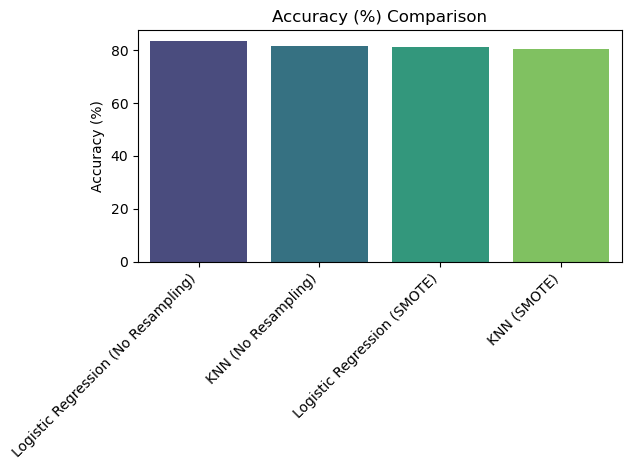

Accuracy Bar Plot:
-------------------
This chart provides a comparative view of how well each model correctly predicts both classes in the dataset.
From the visualization, the Logistic Regression without data resampling model appears to have the highest accuracy. However, accuracy isn't always the best metric when classes are imbalanced.




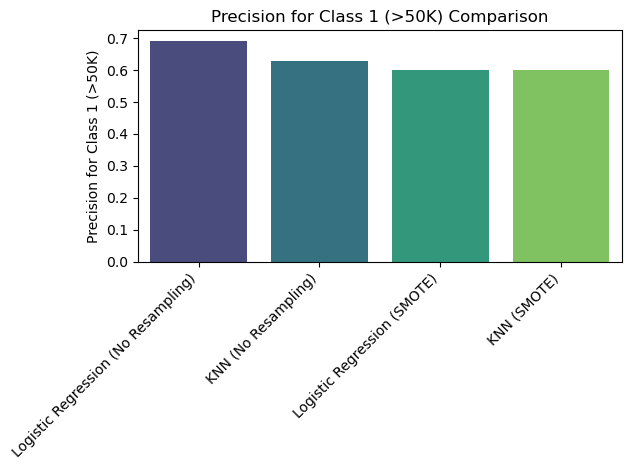

Precision for Class 1 (>50K) Bar Plot:
--------------------------------------
Precision is a measure of how many of the positive class predictions were actually correct.
This visualization compares the precision for predicting the ">50K" class across the four models.
Logistic Regression without resampling has the highest precision, meaning it was the most precise in predicting positive classes. It made fewer false positive errors compared to the others.




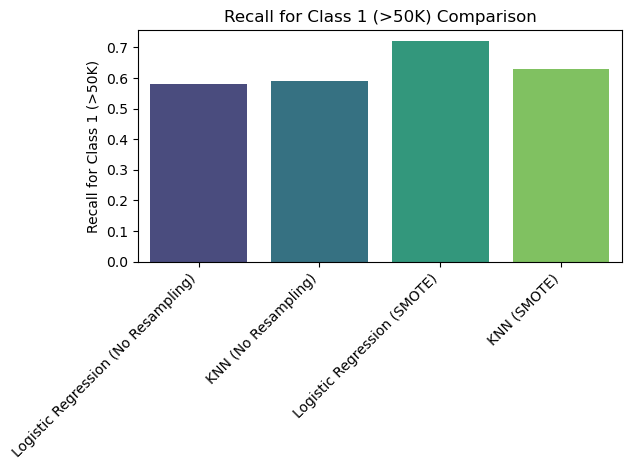

Recall for Class 1 (>50K) Bar Plot:
----------------------------------
Recall is a measure of how many of the actual positive cases were detected by the model.
For predicting incomes ">50K", Logistic Regression with SMOTE resampling has the highest recall. This indicates it's the best at capturing the majority of the actual positive cases, but may have more false positives as a result.




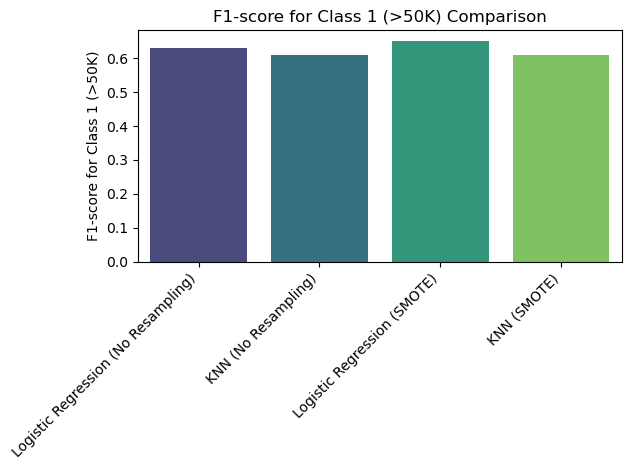

F1-score for Class 1 (>50K) Bar Plot:
------------------------------------
The F1-score is the harmonic mean of precision and recall and provides a balance between the two.
A higher F1-score suggests a balanced model in terms of false positives and false negatives.
From the bar plot, Logistic Regression with SMOTE has the best F1-score, showing it provides the best balance between precision and recall for the ">50K" class.


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
models = ["Logistic Regression (No Resampling)", "KNN (No Resampling)", 
          "Logistic Regression (SMOTE)", "KNN (SMOTE)"]

accuracy = [83.33, 81.41, 81.15, 80.37]
precision = [0.69, 0.63, 0.60, 0.60]
recall = [0.58, 0.59, 0.72, 0.63]
f1_score = [0.63, 0.61, 0.65, 0.61]

# Visualization function
def plot_metrics(metrics, metric_name):
    sns.barplot(x=models, y=metrics, palette="viridis")
    plt.title(f"{metric_name} Comparison")
    plt.ylabel(metric_name)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# Visualizations
plot_metrics(accuracy, "Accuracy (%)")
print("Accuracy Bar Plot:")
print("-------------------")
print("This chart provides a comparative view of how well each model correctly predicts both classes in the dataset.")
print("From the visualization, the Logistic Regression without data resampling model appears to have the highest accuracy. However, accuracy isn't always the best metric when classes are imbalanced.")
print("\n")

plot_metrics(precision, "Precision for Class 1 (>50K)")
print("Precision for Class 1 (>50K) Bar Plot:")
print("--------------------------------------")
print("Precision is a measure of how many of the positive class predictions were actually correct.")
print("This visualization compares the precision for predicting the \">50K\" class across the four models.")
print("Logistic Regression without resampling has the highest precision, meaning it was the most precise in predicting positive classes. It made fewer false positive errors compared to the others.")
print("\n")

plot_metrics(recall, "Recall for Class 1 (>50K)")
print("Recall for Class 1 (>50K) Bar Plot:")
print("----------------------------------")
print("Recall is a measure of how many of the actual positive cases were detected by the model.")
print("For predicting incomes \">50K\", Logistic Regression with SMOTE resampling has the highest recall. This indicates it's the best at capturing the majority of the actual positive cases, but may have more false positives as a result.")
print("\n")

plot_metrics(f1_score, "F1-score for Class 1 (>50K)")
print("F1-score for Class 1 (>50K) Bar Plot:")
print("------------------------------------")
print("The F1-score is the harmonic mean of precision and recall and provides a balance between the two.")
print("A higher F1-score suggests a balanced model in terms of false positives and false negatives.")
print("From the bar plot, Logistic Regression with SMOTE has the best F1-score, showing it provides the best balance between precision and recall for the \">50K\" class.")


These heatmaps visually represent the number of true positives, false positives, true negatives, and false negatives made by each model.
The x-axis represents the predicted labels, and the y-axis the true labels.
Brighter squares indicate higher values.
For example, in the Logistic Regression without resampling matrix:
True Positives (bottom right): 1333 instances where the model correctly predicted ">50K".
False Positives (top right): 586 instances where the model incorrectly predicted ">50K".
True Negatives (top left): 6473 instances where the model correctly predicted "<=50K".
False Negatives (bottom left): 975 instances where the model incorrectly predicted "<=50K".


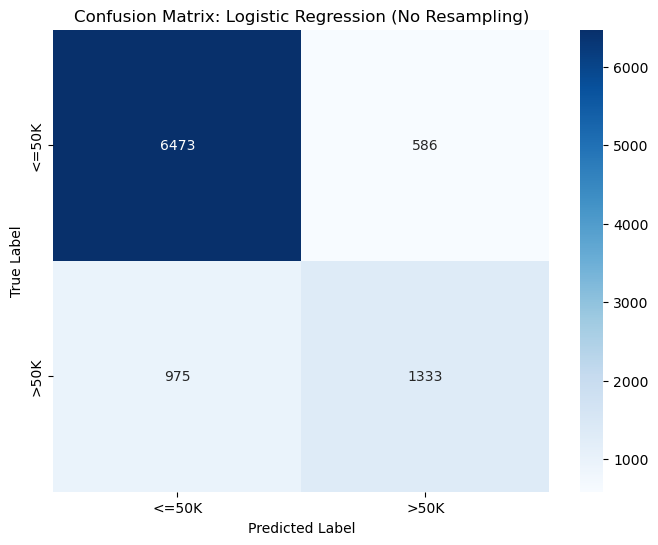

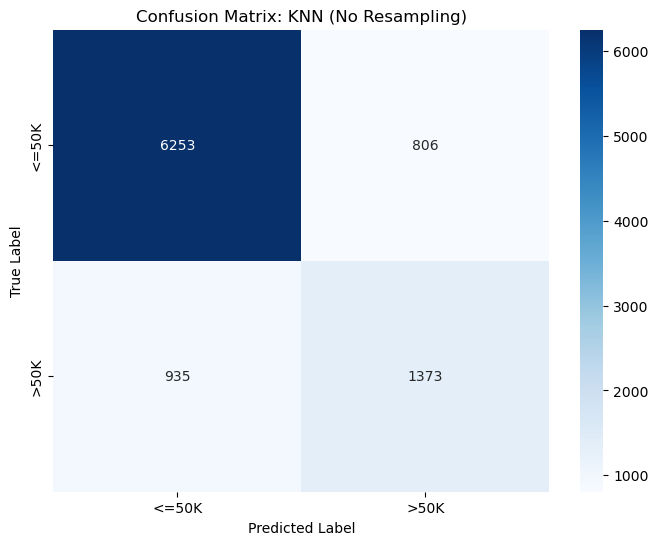

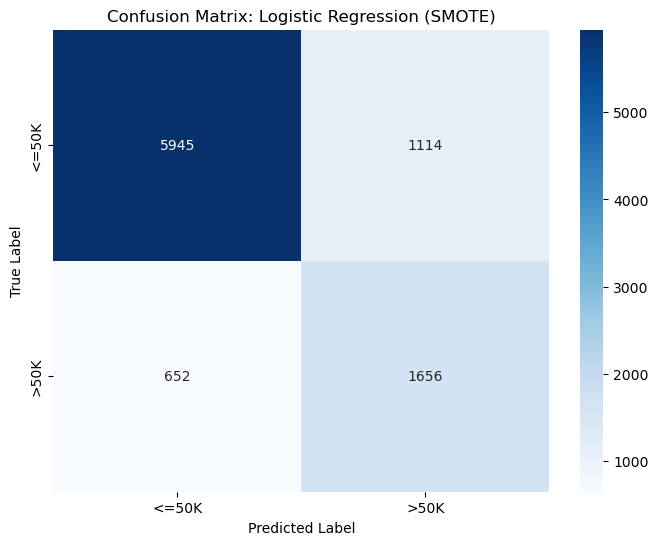

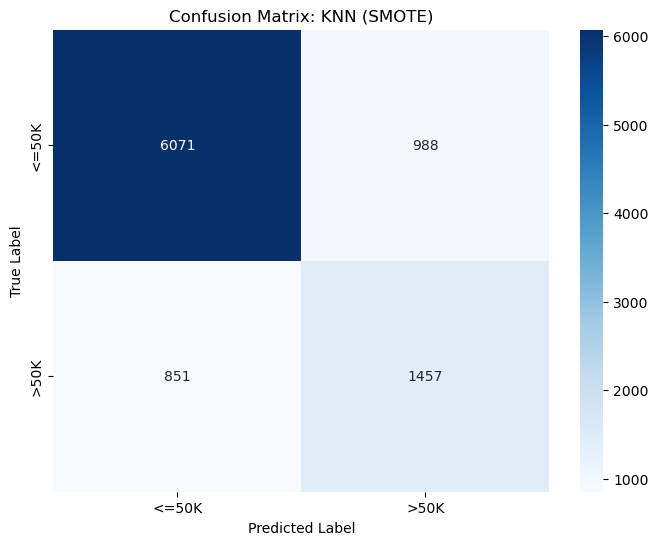

In [20]:
# Confusion matrices

print("These heatmaps visually represent the number of true positives, false positives, true negatives, and false negatives made by each model.")
print("The x-axis represents the predicted labels, and the y-axis the true labels.")
print("Brighter squares indicate higher values.")
print("For example, in the Logistic Regression without resampling matrix:")
print("True Positives (bottom right): 1333 instances where the model correctly predicted \">50K\".")
print("False Positives (top right): 586 instances where the model incorrectly predicted \">50K\".")
print("True Negatives (top left): 6473 instances where the model correctly predicted \"<=50K\".")
print("False Negatives (bottom left): 975 instances where the model incorrectly predicted \"<=50K\".")

confusion_matrices = [
    [[6473, 586], [975, 1333]],
    [[6253, 806], [935, 1373]],
    [[5945, 1114], [652, 1656]],
    [[6071, 988], [851, 1457]]
]

for idx, matrix in enumerate(confusion_matrices):
    plt.figure(figsize=(8,6))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.title(f"Confusion Matrix: {models[idx]}")
    plt.show()

## Discussion and Conclusion

From the analysis of the given results, several insights and learnings emerge that have significant implications for future predictive modeling endeavors:

**The Importance of Class Imbalance Handling:**<br>
The use of SMOTE for data resampling clearly influenced the performance metrics of both classifiers. While the accuracy for Logistic Regression slightly decreased after resampling, recall for the minority class ">50K" improved. This illustrates that addressing class imbalances can be instrumental in improving a model's sensitivity towards minority classes, even at the expense of overall accuracy.

**Accuracy Isn't Everything:**<br>
Although Logistic Regression without resampling boasted the highest accuracy, it doesn't necessarily make it the best model. As a model can achieve high accuracy by mostly predicting the majority class. Precision, Recall, and the F1-score provide a more comprehensive understanding of model performance, particularly for the minority class.

**Model Specificity:**<br>
Different models responded differently to the resampling. While the K-Nearest Neighbors classifier's accuracy dipped with resampled data, the Logistic Regression's recall spiked. This underscores the fact that different algorithms may have varying sensitivities to data preprocessing techniques.

**Scope for Improvement:**

**Feature Engineering:**<br>
The models' performances can potentially be enhanced by exploring more advanced feature engineering techniques. For instance, creating interaction terms, polynomial features, or extracting insights from domain knowledge could provide the models with richer information.

**Hyperparameter Tuning:**<br>
Neither of the models' hyperparameters were discussed in the results. Further improvements might be gleaned from a meticulous hyperparameter tuning process using methods like GridSearchCV or RandomizedSearchCV. Unfortunetly do to runtime error this was not achieveable using  both GridSearchCV an RandomizedSearchCV both resulted in extremley long proccessing time.

**Advanced Models:**<br>
Beyond logistic regression and KNN, there are more sophisticated algorithms, such as ensemble methods (Random Forest, Gradient Boosted Trees) or neural networks, which might yield better performance on this dataset.